# ML T-Generation Занятие 3: Линейная регрессия.
# Проблема переобучения. Кросс-валидация и регуляризация.

Авторы: Гаркавый Андрей (andrewgarkavyy@gmail.com), Кирилл Васильев (kirivasile@yandex.ru)

Переработал: Чайников Константин (chainikov.k.m@gmail.com)

## 0. План

1. Линейная регрессия

2. Приближение многочленом

3. Переобучение

4. Выводы

5. Разделение на тренировочную и тестовую части

6. Кросс-валидация

7. Как подбираются коэффициенты

8. Регуляризация



## 1. Линейная регрессия
**Регрессией** называется задача машинного обучения с учителем, в которой у нас есть много объектов с признаками, у которых надо научиться приближенно предсказывать значение целевой функции, которая равна какому-то **действительному числу**. 

В этом будет отличие задачи регрессии от задачи классификации - регрессия предсказывает число, а классификация - один из нескольких классов.**Текст, выделенный полужирным шрифтом**

In [384]:
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [385]:
model = LinearRegression(fit_intercept=True  )

Давайте положим в X какие-то трехмерные векторы.

In [386]:
X = np.ones((200,3))

X[:,1]*=np.random.normal(0,1,(200,))
X[:,2]*=np.random.normal(0,1,(200,))
X

array([[ 1.00000000e+00,  1.78589141e+00, -2.79497297e-01],
       [ 1.00000000e+00,  1.41591211e+00, -6.03894165e-01],
       [ 1.00000000e+00, -8.88481772e-01,  1.30562008e-01],
       [ 1.00000000e+00, -2.11162843e-01, -3.84947921e-01],
       [ 1.00000000e+00,  7.79085262e-01,  1.01544807e+00],
       [ 1.00000000e+00, -3.65823182e-01, -2.41098962e+00],
       [ 1.00000000e+00,  1.42222050e+00, -8.69320818e-01],
       [ 1.00000000e+00,  1.22405846e-01, -8.76294605e-01],
       [ 1.00000000e+00,  1.12219122e-01,  1.94113406e-01],
       [ 1.00000000e+00,  2.01311979e+00,  1.47601882e-01],
       [ 1.00000000e+00, -9.14034127e-01, -3.96178253e-01],
       [ 1.00000000e+00,  9.92967702e-01,  1.89535977e-02],
       [ 1.00000000e+00, -1.36527069e+00,  1.68904517e-01],
       [ 1.00000000e+00,  6.31499393e-01,  1.55434295e+00],
       [ 1.00000000e+00, -1.20068674e+00, -1.06707564e+00],
       [ 1.00000000e+00, -1.12518520e+00, -1.22062394e+00],
       [ 1.00000000e+00, -2.77996499e-02

Построим $y$ по такой формуле:

$$y = 50 + 14x_1 - 7x_2  + \varepsilon$$

Где $\varepsilon$ - это какой-то шум с нормальным распределением с дисперсией 5, чтобы линейная формула не была уж совсем точной.

In [387]:
y = X @ np.array([50,14,-7]) + np.random.normal(0,5,(200,))
y

array([ 73.44889979,  78.51754976,  44.08520244,  47.49570766,
        51.85031214,  52.84686162,  78.36339805,  60.14283163,
        52.38802115,  74.12825703,  41.96439956,  79.81277656,
        36.46294935,  47.40853058,  39.90791146,  49.19665304,
        65.58233962,  65.3720847 ,  65.00151809,  46.16631233,
        58.03127327,  40.48168989,  61.41114854,  45.59702806,
        53.40764633,  55.30063821,  35.14989174,  50.07971741,
        69.60358021,  39.96645267,  31.48878417,  37.35070415,
        64.16225975,  55.34497072,  59.14032772,  65.70821604,
        58.55856131,  77.00159002,  60.39874045,  50.12981097,
        34.5022196 ,  37.24604959,  75.27892664,  56.47546339,
        35.97823521,  68.17823849,  73.97557788,  45.60054556,
        95.33307491,  68.07118996,  46.33342577,  48.34668214,
        74.95803626,  42.73002016,  34.46207892,  47.26604362,
        65.06514151,  47.95027895,  64.04667433,  46.87954394,
        51.69862968,  75.56202737,  60.4120162 ,  48.73

Теперь обучим на этих данных линейную регрессию и посмотрим, сможет ли она восстановить параметры модели $50, 14, -7$.

In [388]:
model.fit(X[:,[1,2]], y)

LinearRegression()

In [389]:
coefs = model.coef_
coefs

array([13.93402621, -6.80640481])

In [390]:
const = model.intercept_
const

50.27850855449195

In [391]:
np.linalg.inv(X.T @ X) @ X.T @ y 

array([50.27850855, 13.93402621, -6.80640481])

In [392]:
# X = np.ones((200,3))
# X[:,1]*=np.random.normal(0,1,(200,))
# X[:,2]*=np.random.normal(0,1,(200,))

# y = X @ np.array([50,14,-7]) + np.random.normal(0,5,(200,))

In [393]:
import plotly.express as px
import plotly.graph_objects as go


fig = px.scatter_3d(np.concatenate((X,y.reshape(-1,1)), axis=1),  x=1, y=2, z=3,
                    size_max=5, opacity=0.5, color_discrete_sequence=['red'])

# tight layout
fig.update_layout(margin=dict(l=10, r=100, b=100, t=10))

x1 = np.linspace(-3, 3, 30)
y1 = np.linspace(-3, 3, 30)
xx, yy = np.meshgrid(x1, y1)
z = np.c_[xx.ravel(), yy.ravel()] @ np.array(coefs[0:2]) + const 

# transpose
z = z.reshape(xx.shape)
fig.add_traces(go.Surface(x=x1, y=y1, z=z, showscale=False,
                          opacity=0.3, colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']]))
fig.show()

И внезапно линейная регрессия как-то примерно угадала наши коэффициенты! Примерно, потому что мы добавили шум.

Как она это делает? Сейчас узнаем.

### КАК работает линейная регрессия

По сути мы хотим подобрать числа $a_0, a_1, a_2, a_3$ для вот такой модели:

$$f(x_1, x_2, x_3) = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3$$

Мы хотим подобрать их так, чтобы функция потерь на наших данных была минимальна. В LinearRegression используют функцию потерь MSE - сумму квадратов отклонений от настоящего значения.

То есть задача такая:

$$\sum\limits_{i=1}^{n}(f(x_{i1}, x_{i2}, x_{i3}) - y_i)^2 \rightarrow \min$$


$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)^2 \rightarrow \min$$

Где n - это количество входных данных. Давайте рассмотрим эту сумму как функцию от 4 переменных $a_0, a_1, a_2, a_3$, которую нам нужно минимизировать. А числа $x_{ij}$ и $y_i$, получается, будут обычными константами.

$$MSE(a_0, a_1, a_2, a_3) \rightarrow \min$$

Давайте посчитаем частную производную по каждой координате.

Начнем с координаты $a_1$.

$$MSE'_{a_1}(a_0, a_1, a_2, a_3) = \sum\limits_{i=1}^{n}((a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)^2)'_{a_1}=$$

Раскрываем квадрат, вынося отдельно члены, которые делятся на $a_1^2$, $a_1$ и $1$.

$$= \sum\limits_{i=1}^{n}(x_{i1}^2a_1^2 + 2x_{i1}(a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i)a_1 + (a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i)^2)'_{a_1}=$$

Считаем производную, одна из скобок при этом обнуляется:

$$= \sum\limits_{i=1}^{n}(2x_{i1}^2a_1 + 2x_{i1}(a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i))=$$

Теперь вынесем $2$ и $x_{i1}$

$$= 2\sum\limits_{i=1}^{n}(x_{i1}a_1 + a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i1}=$$

Заметим, что в скобках получилось очень простое выражение!

$$= 2\sum\limits_{i=1}^{n}(f(x_{i1}, x_{i2}, x_{i3}) - y_i)x_{i1}$$

Давайте приравняем все 4 производные (по $a_0, a_1, a_2, a_3$) нулю, тогда:

$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i) = 0$$
$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i1} = 0$$
$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i2} = 0$$
$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i3} = 0$$

Давайте сгруппируем все выражения по $a_0, a_1, a_2, a_3$:

$$na_0 + (\sum\limits_{i=1}^{n}x_{i1})a_1 + (\sum\limits_{i=1}^{n}x_{i2})a_2 + (\sum\limits_{i=1}^{n}x_{i3})a_3= \sum\limits_{i=1}^{n}y_i$$

$$(\sum\limits_{i=1}^{n}x_{i1})a_0 + (\sum\limits_{i=1}^{n}x_{i1}^2)a_1 + (\sum\limits_{i=1}^{n}x_{i1}x_{i2})a_2 + (\sum\limits_{i=1}^{n}x_{i1}x_{i3})a_3= \sum\limits_{i=1}^{n}x_{i1}y_i$$

$$(\sum\limits_{i=1}^{n}x_{i2})a_0 + (\sum\limits_{i=1}^{n}x_{i1}x_{i2})a_1 + (\sum\limits_{i=1}^{n}x_{i2}^2)a_2 + (\sum\limits_{i=1}^{n}x_{i2}x_{i3})a_3= \sum\limits_{i=1}^{n}x_{i2}y_i$$

$$(\sum\limits_{i=1}^{n}x_{i3})a_0 + (\sum\limits_{i=1}^{n}x_{i1}x_{i3})a_1 + (\sum\limits_{i=1}^{n}x_{i2}x_{i3})a_2 + (\sum\limits_{i=1}^{n}x_{i3}^2)a_3= \sum\limits_{i=1}^{n}x_{i3}y_i$$

Ура, мы получили красивую симметричную систему уравнения, 4 уравнения, 4 неизвестных. Если определитель матрицы коэффициентов не равен нулю, то у него есть ровно одно решение, и его мы умеем находить (методом Гаусса, например). Если определитель вдруг стал равен нулю, то решений либо 0, либо бесконечно.

У непрерывно-дифференцируемой функции, которая при стремлении по каждой координате к плюс или минус бесконечности сама стремится к плюс бесконечности, всегда существует глобальный минимум. В точке глобального минимума все производные как раз равны нулю. Следовательно, существует всегда хотя бы одно решение, и мы его найдем.

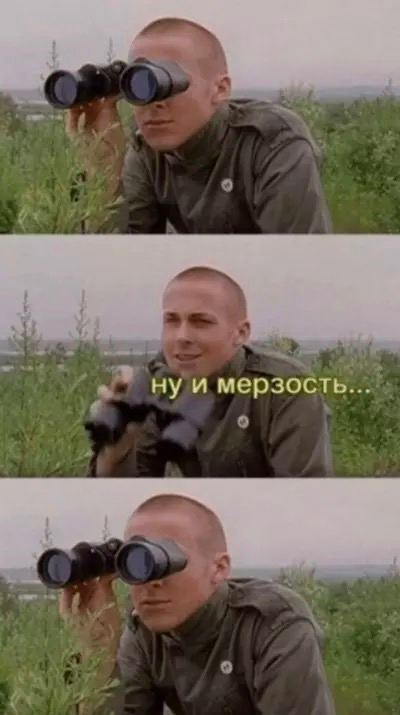

## 2. Приближение одномерной функции многочленом

Начнем с простой задачи.


1) Есть функция $f(x)$, но мы ее не знаем.

2) Зато мы знаем ее значения в $m$ точках (они называются тренировочным множеством):
$$f(x_1) = y_1$$
$$\cdots$$
$$f(x_m) = y_m$$
3) Нужно научиться приблизительно восстанавливать эту функцию.

Самый простой способ - научиться приближать её многочленом, а именно давайте подберем такие коэффициенты $a_0, a_1, \ldots, a_n$, чтобы многочлен $P(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n$ был как можно ближе к $f(x)$.

Но что такое "приблизить"? Мы знаем лишь значения в $m$ точках, так что в лучшем случае она должна проходить через все эти точки (хотя скоро мы увидим, что это не так).

В этом случае обычно пытаются минимизировать сумму квадратов ошибок во всех точках, то есть **функцию потерь** $$Q(P) = \sum_i (P(x_i) - f(x_i))^2 $$

Эту величину называют **MSE** - Mean Squared Error (средняя квадратичная ошибка).

Тут может возникнуть вопрос, почему мы берем именно сумму квадратов, а не, например, сумму модулей. Однозначного ответа на этот вопрос нет, наиболее удачный ответ, пожалуй такой: у суммы квадратов есть много удобных свойств, например это выпуклая, дифференцируемая функция. Тем не менее иногда другой выбор может быть оправданным. Если вам интересно чуть больше понять про смысл этих условий, можете решить такие задачи:

**(0.5 балла) Доп. Задача 1.** Найдите число m такое, что для заданных $x_i$ сумма $\sum|m - x_i|$ минимальна

Решение:

Пусть в отсортированном массиве $x$ длины $l$ есть число $x_k$, такое, что $x_k \geq m, x_{k-1} < m$. Тогда $f(m) = \sum|m - x_i| = \sum(m - x_a) + \sum(x_b - m)$, где $x_a \in \{x_1, x_2, ..., x_{k-1}\}$ и $x_b \in \{x_k, x_{k+1}, ..., x_l\}$

$f'(m) = (\sum(m - x_a))' + (\sum(x_b - m))' = \sum(m - x_a)' + \sum(x_b - m)' = len(\{x_1, x_2, ..., x_{k-1}\}) - len(\{x_k, x_{k+1}, ..., x_l\}) = k-1 - (l-k+1) = k-1-l+k-1 = 2k-l-2$

$f'(m) = 0$, тогда $2k - l - 2 = 0$

$2k = l+2$

$k = 0.5l +1$

Вспомним, что $k$ - индекс $x_k$, тогда $x_k$, находящееся в середине отсортированного массива, является медианой.

**(0.5 балла) Доп. Задача 2.** Найдите число m такое, что для заданных $x_i$ сумма $\sum(m - x_i)^2$ минимальна

Решение:

Обозначения такие же, как в предыдущем решении

$$f(m) = \sum(m - x_i)^2$$
$$f'(m) = \sum((m - x_i)^2)' = \sum2(m - x_i)(m-x_i)' = \sum2(m - x_a) - \sum2(x_b-m)$$
$f'(m) = 0$, тогда
$$\sum2(m - x_a) - \sum2(x_b-m) = 0$$
$$\sum2(m - x_a) = \sum2(x_b-m)$$
$$\sum(m - x_a) = \sum(x_b-m)$$
$$ km - \sum_{i=0}^{k-1} x_i = \sum_{i=k}^l x_i - (l - k)m$$
$$ km + (l - k)m = \sum_{i=k}^l x_i + \sum_{i=0}^{k-1} x_i $$
$$ lm = \sum x_i $$
$$ m = \frac{1}{l}\sum x_i$$
Так как $l$ - количество чисел (т.е. длина массива), $m$ является средним арифметическим всех чисел.

Сначала просто нарисуем какой-нибудь многочлен, например $f(x) = 3x^3 - 2x^2 + x$ на отрезке $[-1, 1]$:

In [394]:
def f(x):
    return 3 * x ** 3 - 2 * x**2 + x

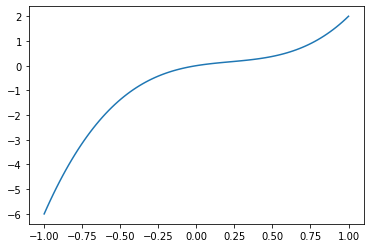

In [395]:
x100 = np.linspace(-1, 1, 100)
plt.plot(x100, f(x100))
plt.show()

Теперь зададим набор точек (10 штук) и посмотрим что будет, если подобрать по ним коэффициенты нашего многочлена:

In [396]:
x = np.linspace(-1, 1, 10)  # 10 точек на отрезке [-1, 1]
y = f(x)
coefs = np.polyfit(x, y, deg = 2)
coefs

array([-2.00000000e+00,  3.17037037e+00, -8.42600032e-16])

(это означает многочлен $-2x^2 + 3.17037 x$)

numpy позволяет легко работать с многочленами, заданными их коэффициентами. Мы можем создать из них объект poly1d, который можно будет просто вызывать для получения нужных значений:

In [397]:
poly = np.poly1d(coefs)
poly(0), poly(1), poly(2)

(-8.426000324584082e-16, 1.1703703703703712, -1.6592592592592563)

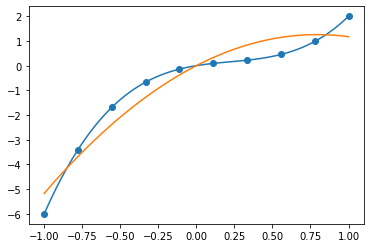

In [398]:
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

Довольно ожидаемо, наша функция (оранжевая) не очень похожа на то, что мы искали (синяя). Наверное зря мы пытаемся приблизить кубическую функцию многочленом второй степени. Давайте попробуем 3-ю степень.

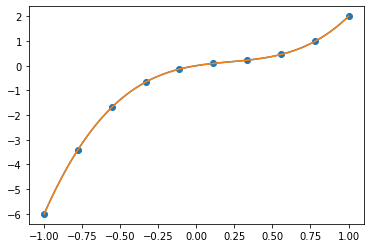

In [399]:
coefs = np.polyfit(x, y, deg = 3)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

На этот раз мы в точности угадали функцию. Можете проверить, что если увеличивать степень многочлена, результат не меняется: более высокие степени тут просто не нужны.

Но мы сейчас жили в идеальном мире. На практике чаще всего известные нам значения не совсем точны. Давайте добавим к значениям нашей функции немного шума:

In [400]:
def f_real(x):
    return 3 * x ** 3 - 2 * x**2 + x + np.random.normal(0, 1, x.shape)

In [401]:
x.shape

(10,)

In [402]:
x = np.linspace(-1, 1, 10)
y = f_real(x) # + np.random.normal(0, 0.5, 10)  # случайный шум

In [403]:
x100 = np.linspace(-1, 1, 100)

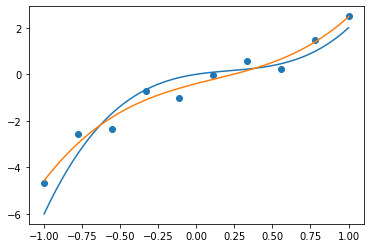

In [404]:
coefs = np.polyfit(x, y, deg = 3)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

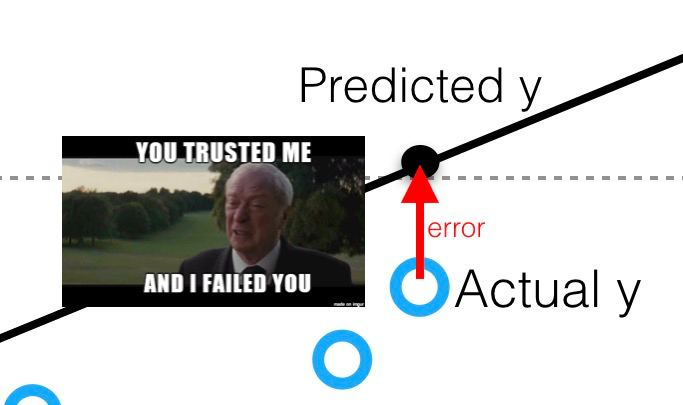

Теперь мы почти попали. Перед тем как читать дальше, подумайте над заданием.

**(1 балл) Обязательное задание 1:** попробуйте увеличить степень полинома. Что произойдет с графиком нашего приближения? Посмотрите  как обе функции себя ведут вне интервала x. Попробуйте сформулировать проблему, с которой мы столкнулись.

**Решение**
При увеличении степени полинома график следует за каждой точечкой (так получилось, поскольку степень равна количеству точек), причём из-за такого точного следования за каждой точкой их шум сильно меняет предсказания.

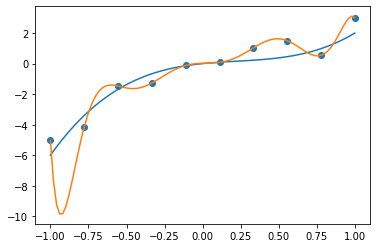

In [405]:
x = np.linspace(-1, 1, 10)
y = f_real(x)

x100 = np.linspace(-1, 1, 100)

coefs = np.polyfit(x, y, deg = 10)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

Если посмотреть за пределы X, на которых есть тренировочные точки, то можно заметить, что график-приближение не всегда (почти никогда) хотя бы отдалённо совпадает с оригинальным: они могут даже расходиться в разные стороны, один в $+\infty$, другой в $-\infty$.

Таким образом, в области тренировочных точек предсказания начинают сильно зависеть от малых изменений и шума, так как точки почти заучиваются, обобщающая способность падает, а вне области с тренировочными точками приближение вообще таковым не является: расхождения становятся очень большими

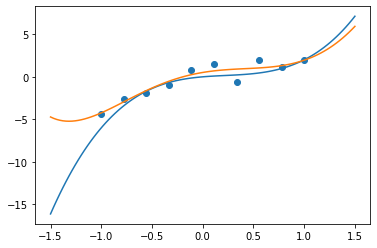

In [406]:
x = np.linspace(-1, 1, 10)
y = f_real(x)

x100 = np.linspace(-1.5, 1.5, 100)

coefs = np.polyfit(x, y, deg = 5)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

## 3. Переобучение

То, что вы увидели при решении этого задания называется в машинном обучении **переобучением** (overfittig).

Если мы используем достаточно сложную модель (то есть модель, у которой много параметров, в нашем случае -- многочлен достаточно высокой степени), то у модели появляется возможность "выучить" все точки, которые она видела. Например, если задано $m$ точек, всегда можно подобрать многочлен степени $m-1$, который через них проходит (если вы не знакомы с этим фактом, можете подумать, как его доказать).


"Честный" способ проверять качество нашей апроксимации -- **смотреть точность в точках, которые мы не использовали при подборе многочлена**. Это множество часто называют тестовым множеством. Давайте зададим его так:

In [407]:
# возьмем 10 случайных точек от 0 до 1
x_test = np.random.random(10) 

# превратим их в 10 случайных точек от -1 до 1
x_test = 2 * x_test - 1
x_test

array([-0.15039545, -0.5519068 ,  0.53921974,  0.98218366, -0.75205076,
        0.00693479, -0.60806409,  0.03410892, -0.79261626,  0.83513398])

**(1 балл)  Обязательное задание 2:** напишите функцию, которая для данного многочлена считает его качество на тестовом множестве (то есть среднеквадратичное отклонение между значениями функции $f$ и многочлена $P$ на тестовой выборке).

Вы все прошлое занятие изучали разные функции, попробуйте сделать MSE как можно более компактной функцией (желательно в одну строчку).

In [408]:
# y_real - это np.array c реальными значениями в точках
# y_pred - это np.array c предсказанными нами значениями в точках
# они одной длины
def MSE(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

**(1 балл) Обязательное задание 3:** нарисуйте график зависимости ошибки на тестовом множестве от степени многочлена. При какой степени ошибка минимальна?


На таком малом количестве точек минимальная ошибка перемещается между степенями, т.к. случайные положения тестовых точек очень сильно влияют на измерение MSE.

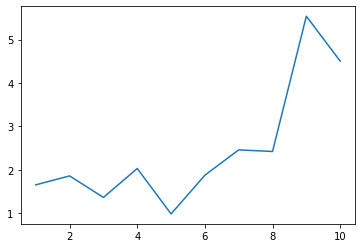

In [409]:
mses = list()
for degree in range(1, 11):
    coefs = np.polyfit(x, y, deg = degree)
    f_pred = np.poly1d(coefs)

    y_pred = f_pred(x_test)
    y_real = f_real(x_test)
    mses.append(MSE(y_real, y_pred))

x_plot = np.arange(1, 11)
y_plot = np.array(mses)
plt.plot(x_plot, y_plot)
plt.show()

**(1 балл) Доп. задача 5:** как меняется график, если увеличивать количество точек в множестве, на котором мы подбираем многочлен?

С увеличением кол-ва точек случайное перемещение каждой из них перестаёт так сильно влиять на измерение MSE. Минимум ошибки теперь стабильно находится на 3-4 степени.

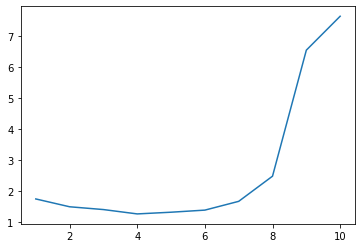

In [410]:
x_test = np.random.random(1000) 

x_test = 2 * x_test - 1
x_test

mses = list()
for degree in range(1, 11):
    coefs = np.polyfit(x, y, deg = degree)
    f_pred = np.poly1d(coefs)

    y_pred = f_pred(x_test)
    y_real = f_real(x_test)
    mses.append(MSE(y_real, y_pred))

x_plot = np.arange(1, 11)
y_plot = np.array(mses)
plt.plot(x_plot, y_plot)
plt.show()

## 4. Выводы

1. Цель машинного обучения с учителем - приблизить **целевую функцию** (target) по её значениям (возможно приблзительным) в некоторых точках.

В нашем случае - это $f(x) = 3x^3 - 2x^2 + x$. Обычно она, конечно, никому неизвестна.

2. Множество точек с известным значением функции называется **тренировочным множеством** (train).

В нашем случае - это 10 точек, выбранных равномерно на отрезке $[-1, 1]$.

3. Чтобы приблизить функцию, нужно использовать какую-то **модель** (model), приближающую функцию.

В данном случае - это многочлен $P(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n$.

4. Мы выбираем **функцию потерь** (loss function) для сравнения результатов модели и реальных значения на тренировочном множестве. Чем она меньше, тем лучше наша модель.

В данном случае - это $MSE = \sum_i (P(x_i) - f(x_i))^2$.

5. У модели есть **параметры**, которые мы выбираем так, чтобы функция потерь на тренировочном множестве была минимальна.

В данном случае - это коэффициенты многочлена ($a_0, a_1, \ldots, a_n$). Выбираются они с помощью пока магической для нас функции polyfit.

6. У модели есть **гиперпараметры**, которые мы выбираем сами.

В данном случае - это степень многочлена (число $n$).

7. Однако такой подход с минимизацией функции потерь может привести к тому, что мы идеально приблизим функцию на тренировочном множестве, но она будет абсолютно отличаться во всех остальных точках. Это явление называется **переобучением**.

В данном случае - мы видели, что если степень многочлена большая (больше трех), то мы попадаем во все точки, но при этом сам многочлен сильно отличается от $f(x)$.

8. Чтобы бороться с переобучением, полезно выделить **тестовое множество** точек, в которых мы тоже знаем результаты функции. Оно никак не используется при обучении модели, и нужно только для валидации результата.

В данном случае - мы взяли рандомные 10 точек на отрезке $[-1, 1]$.

9. В идеальном случае функция потерь на тренировочном и тестовом множестве не отличается. А вот если на тренировочном функция потерь получается гораздо меньше, чем на тестовом, то это говорит о том, что происходит переобучение.

Действительно, при большой степени MSE близка к или равна нулю на тренировочном множестве, а на тестовом множестве нет.

10. Единственный пока способ, который мы знаем, чтобы влиять на переобучение - это перебирать **гиперпараметры** модели так, чтобы **минимизировать функцию потерь на тестовом множестве**.

Действительно, если выбрать степень 3, то функция потерь окажется минимальной на тестовом множестве, как мы видели в задании 3.

## 5. Разделение на тренировочную и тестовую части

Если вы решите поучаствовать в каком-нибудь соревновании по машинному обучению, вы увидите, что тестовое множество вам недоступно (иначе было бы неинтересно: очень легко обучиться предсказывать то, что ты уже видел).

В реальной жизни обычно тоже считают, что на тестовом множестве можно провериться один раз -- в самом конце. Иначе вы начнете подкручивать гиперпараметры глядя на результат на тестовой выборке и, сами того не замечая, переобучитесь.

Как поступать в такой ситуации? Придется пожертвовать частью точек, которые даны нам для обучения и использовать их для подбора гиперпараметров в нашем алгоритме (в нашем случае это степень многочлена).

То есть придется из точек, у которых мы знаем результаты, убрать, например, 10% в тестовое множество.

Функция для этого есть, например, в пакете sklearn

In [411]:
X = np.linspace(-1, 1, 50)
y = f_real(X)

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [413]:
X_train, y_train

(array([ 0.59183673, -0.34693878,  0.26530612, -0.91836735, -0.06122449,
         0.75510204,  0.42857143, -0.71428571,  0.3877551 ,  0.87755102,
        -0.42857143,  0.46938776, -0.87755102,  1.        ,  0.18367347,
        -0.2244898 ,  0.79591837, -0.46938776,  0.67346939, -0.79591837,
         0.51020408,  0.63265306, -0.02040816,  0.2244898 , -0.14285714,
         0.06122449, -0.83673469, -0.63265306,  0.14285714,  0.95918367,
        -0.75510204,  0.10204082, -1.        , -0.3877551 ,  0.83673469,
        -0.59183673,  0.91836735, -0.30612245, -0.67346939, -0.55102041,
         0.55102041, -0.26530612,  0.71428571,  0.30612245,  0.02040816]),
 array([-0.37026106, -2.73462338,  0.56582492, -4.96810871, -1.22261347,
        -0.34350553, -0.13546377, -0.86127694, -0.16119056, -1.23732252,
         0.08450508,  0.11569286, -5.97910334,  1.32010454,  0.87616246,
        -1.48533358,  2.65446182, -1.26813091,  1.29528997, -4.96382356,
        -0.59424946,  0.33548891, -3.90692896, -0

In [414]:
X_test, y_test

(array([-0.18367347, -0.10204082, -0.51020408,  0.34693878, -0.95918367]),
 array([-1.66798671, -0.54215392, -1.62870955,  0.21051215, -5.80478038]))

## 6. Кросс-валидация

Также есть более точный способ проводить валидацию результата. Если разделить множество один раз на тестовое и тренировочное, то это может значительно влиять на результат. Вдруг в тестовое множество случайно попали такие точки, в которых предсказать значение тяжелее или легче, чем обычно?

Тогда можно применить **кросс-валидацию** - давайте разделим множество на 10 примерно равных частей, тогда у нас есть 10 разделений на тренировочное и тестовое множество - как тестовое множество выберем по очереди каждую из этих частей, а как тренировочное выберем все остальные части. В итоге, все элементы множества побывают и в тренировочной, и в тестовой чати.

Можно посчитать результат на каждом из 10 разбиений и просто усреднить результат.


In [415]:
# Есть вот такая удобная штука
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print(test_index, train_index)

[ 5 13 23 44 47] [ 0  1  2  3  4  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 48 49]
[11 26 30 35 36] [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 31 32 33 34 37 38 39 40 41 42 43 44 45 46 47 48 49]
[ 2 32 40 42 45] [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 33 34 35 36 37 38 39 41 43 44 46 47 48 49]
[ 8 12 25 27 29] [ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 26
 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[ 4 21 31 34 46] [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 28 29 30 32 33 35 36 37 38 39 40 41 42 43 44 45 47 48 49]
[ 7 15 33 41 43] [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 34 35 36 37 38 39 40 42 44 45 46 47 48 49]
[ 1  3 16 20 38] [ 0  2  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 2

**(1 балл) Доп. задача 6:** проделайте все вышеописанное с функцией $f(x) = \frac{1}{1 + e^{-x}}$ на отрезке $[-3, 3]$. Как оптимальная степень зависит от количества точек, по которым вы подбираете многочлен?

1. Построить заданную функцию

2. Взять 10 точек от -3 до 3 и приближать её полиномом разной степени, построить график ошибки

3. Взять 10 случайных точек от -3 до 3 и посмотреть ошибку на этих точках полиномиальных функций обученных по пункту 2 (т.е. взять тренировочные точки для обучения из пункта 2, а тестировать случайными точками) построить график.

4. Добавить в функцию случайный шум и проделать пункты 2 и 3 для неё.

5. Увеличить количество тренировочных(только тренировочных) точек с 10 например до 20 40 60. И проделать пункты 2 и 3, для этих сэмплов

6. Сделать выводы.

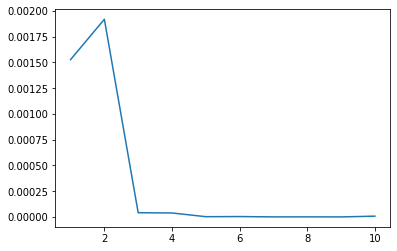

In [416]:
# без шума

def sigmoid(x):
    return 1 / (1 + 2.718 ** (-x))


x_test = np.random.random(10) 
x_test = 6 * x_test - 3

x_train = np.random.random(10) 
x_train = 6 * x_train - 3
y_train = sigmoid(x_train)

mses = list()

for degree in range(1, 11):
    coefs = np.polyfit(x_train, y_train, deg = degree)
    f_pred = np.poly1d(coefs)

    y_pred = f_pred(x_test)
    y_real = sigmoid(x_test)
    mses.append(MSE(y_real, y_pred))

x_plot = np.arange(1, 11)
y_plot = np.array(mses)
plt.plot(x_plot, y_plot)
plt.show()

Отсюда видно, что пока шума нет, чем выше степень, тем лучше приближение даже на тестовых точках

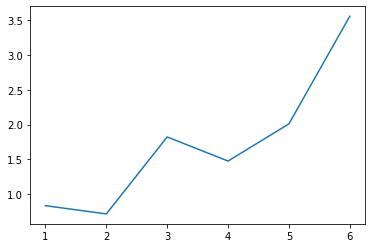

In [417]:
# с шумом

def sigmoid(x):
    return 1 / (1 + 2.718 ** (-x)) + np.random.normal(0, 1, x.shape)


x_test = np.random.random(10) 
x_test = 6 * x_test - 3

x_train = np.random.random(10) 
x_train = 6 * x_train - 3
y_train = sigmoid(x_train)

mses = list()

for degree in range(1, 7):
    coefs = np.polyfit(x_train, y_train, deg = degree)
    f_pred = np.poly1d(coefs)

    y_pred = f_pred(x_test)
    y_real = sigmoid(x_test)
    mses.append(MSE(y_real, y_pred))

x_plot = np.arange(1, 7)
y_plot = np.array(mses)
plt.plot(x_plot, y_plot)
plt.show()

График ошибки при добавлении шума меняется от запуска к запуску, но на четвёртой степени чаще всего ошибка минимальна

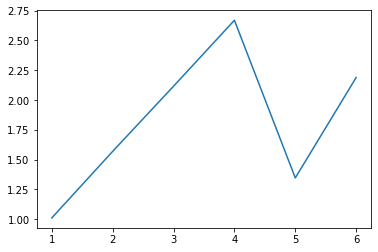

In [418]:
# с шумом и кучей тренировочных точек

def sigmoid(x):
    return 1 / (1 + 2.718 ** (-x)) + np.random.normal(0, 1, x.shape)


x_test = np.random.random(10) 
x_test = 6 * x_test - 3

x_train = np.random.random(50) 
x_train = 6 * x_train - 3
y_train = sigmoid(x_train)

mses = list()

for degree in range(1, 7):
    coefs = np.polyfit(x_train, y_train, deg = degree)
    f_pred = np.poly1d(coefs)

    y_pred = f_pred(x_test)
    y_real = sigmoid(x_test)
    mses.append(MSE(y_real, y_pred))

x_plot = np.arange(1, 7)
y_plot = np.array(mses)
plt.plot(x_plot, y_plot)
plt.show()

С увеличением количества тренировочных точек минимум графика ошибки остановился на 4 степени полинома, минимум стал отчётливо виден при повторениях всей процедуры.

**Вывод:** данные рулят, большие качественные датасеты помогают бороться с переобучением, подсвечивая гиперпараметры, где переобучение минимально.

## 7. Линейная регрессия на реальных данных

До этого мы учились приближать одномерную функцию многочленом. Каждая точка имела ровно один признак - коодинату $x$.

Тем не менее, чаще всего в машинном обучении признаков гораздо больше. Возьмем какой-нибудь реальный датасет.

In [419]:
# https://drive.google.com/file/d/13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb/view?usp=sharing
!gdown --id 13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb
To: /content/Advertising.csv
100% 5.17k/5.17k [00:00<00:00, 7.23MB/s]


In [420]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


В датасете показаны результаты продаж разных товаров в зависимости от ресурсов (тысяч долларов), которые вложили в различные средства распространения информации:
* TV - реклама по телевизору
* radio - на радио
* newspapers - в газетах

Целевая переменная:

sales - продажи такого-то товара (тысячи штук)

In [421]:
# Размеры датасета
data.shape

(200, 4)

In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [423]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Признаков немного, поэтому давайте попробуем визуализиовать зависимость целевой переменной от каждого из признаков.

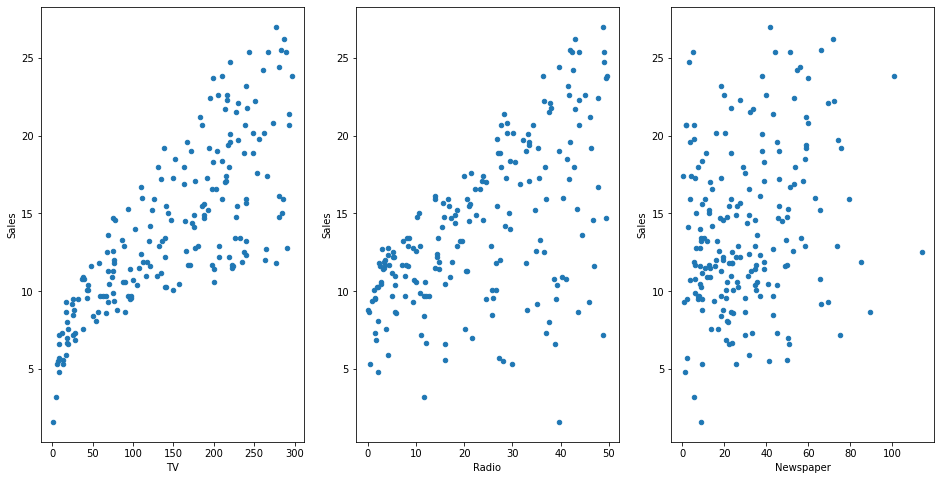

In [424]:
fig, axs = plt.subplots(1, 3,)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

### Простая линейная регрессия

Из графиков выше предположим, что только размер рекламы на телевизоре влияет на продажи больше всего. Формула для такого случая выглядит следующим образом:
$$y=\beta_0+\beta_1x$$
Здесь:
* $y$ - наше предсказание продаж
* $x$ - сколько денег вложили в рекламу по телевидению
* $\beta_0$ - сдвиг
* $\beta_1$ - параметр, отвечающий за важность признака x

$\beta_0$ и $\beta_1$ - это параметры нашей модели. Чтобы создать хорошую модель, надо "обучить" эти значения. Т.е. изменить их так, чтобы они хорошо работали для нашей задачи.

### Обучение коэффициентов модели

Параметры $\beta_0$ и $\beta_1$ подбираются таким образом, чтобы минимизировать **сумму наименьших квадратов ошибок**:

$$Q(MSE)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2$$

<img src="https://i.pinimg.com/originals/95/99/b0/9599b04198dc617282026d00a6e8f9d4.png">

* Фиолетовые точки на даграмме $y^{true}$ - это полученные истинные значения x и y .
* Синяя линия $y^{pred}$ - это наша модель: линия, которой мы стараемся приблизить данные .
* Красные отрезки - это ошибки нашей модели.


Как коэффициенты $\beta_0$ и $\beta_1$ соотносятся с синей линией:
* $\beta_0$ - это сдвиг нашей прямой, т.е. значение y при x = 0.
* $\beta_1$ - это тангенс угла наклона прямой.

Как искать данные коэффициенты? Есть много техник: аналитическое решение, методы основанные на градиентном спуске. Пока же достаточно знать, что многие библиотеки (в том числе и sklearn) умеют это делать. Зачем кожаному мешку напрягаться :)

In [425]:
from sklearn.linear_model import LinearRegression

# Наша модель
reg = LinearRegression()

# Подготовим данные для неё
# На вход требуется 2D матрица, а у нас только один признак,
# и надо превратить его из 1D вектора (n,) в 2D матрицу (n, 1).
# Это можно сделать с помощью метода reshape
x = data["TV"].values.reshape(-1, 1) 
y = data["Sales"].values

# Обучаем нашу модель
reg.fit(x, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
print("Массив коэффициентов={}".format(reg.coef_))

Сдвиг=7.032593549127695
Массив коэффициентов=[0.04753664]


### Интерпретируем коэффициенты
Что означает коэффициент, связанный с телевидением ($\beta_1$)?
* Дополнительные 1000 000$, вложенные на в рекламу на телевидении, позволят продажам товара вырасти где-то на 0.047 * 1000 = 47 тысяч единиц.

In [426]:
# Посчитаем ручками
7.032594 + 0.047537*1000

54.56959400000001

In [427]:
X_new = pd.DataFrame({'TV': [1000]})
X_new.head()

,TV
0,1000


In [428]:
reg.predict(X_new)

array([54.56923398])

### Нарисуем нашу прямую

In [429]:
# Возьмём предсказания для данных, на которых обучались
y_pred = reg.predict(x)
y_pred.shape

(200,)

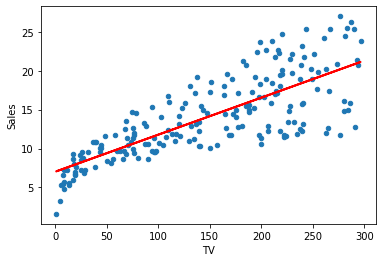

In [430]:
# Сначала выведем истинные данные
data.plot(kind='scatter', x='TV', y='Sales')

# Теперь рисуем нашу линию
plt.plot(x, y_pred, c='red', linewidth=2)
plt.show()

Посчитаем ошибку MSE на обучающей выборке:


In [431]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_pred, y))

10.512652915656757


### Используем все признаки

Простую линейную регрессию с одним признаком можно легко расширить на случай нескольких признаков:
$$y=\beta_0+\beta_1x_1+...+\beta_nx_n$$

А для нашего датасета это будет выглядеть так:
$$Sales=\beta_0+\beta_1*TV+\beta_2*radio+\beta_3*newspaper$$

Давайте опять воспользуемся sklearn, чтобы их оценить:

In [432]:
reg = LinearRegression()

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Обучаем нашу модель
reg.fit(X, y)

# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))

Сдвиг = 2.938889369459412
Коэффициент для TV = 0.0457646454553976
Коэффициент для Radio = 0.18853001691820448
Коэффициент для Newspaper = -0.0010374930424763285


Вес признака отвечает также, как и в предыдущем случае за значимость этого признака. Для газет он вообще отрицательный. Вычислим ошибку на обучающей выборке.

In [433]:
y_pred = reg.predict(X)

# Ошибка теперь равна:
print(mean_squared_error(y_pred, y))

2.784126314510936


Ошибка уже меньше, чем при одном признаке, однако измерять ошибку на обучающей выборке неправильно. Помимо истинной зависимости между признаками и целевой переменной, туда могут затесаться случайности, лишние данные и прочие факторы. Если не ограничивать каким-то образом модель (об этом мы узнаем позднее), то модель легко подстраивается под эти шумы. Она начинает показывать очень хорошее качество на обучающей выборке, но когда мы попробуем посмотреть качество на других выборках, то там модель будет показывать себя плохо. Это и есть переобучение.

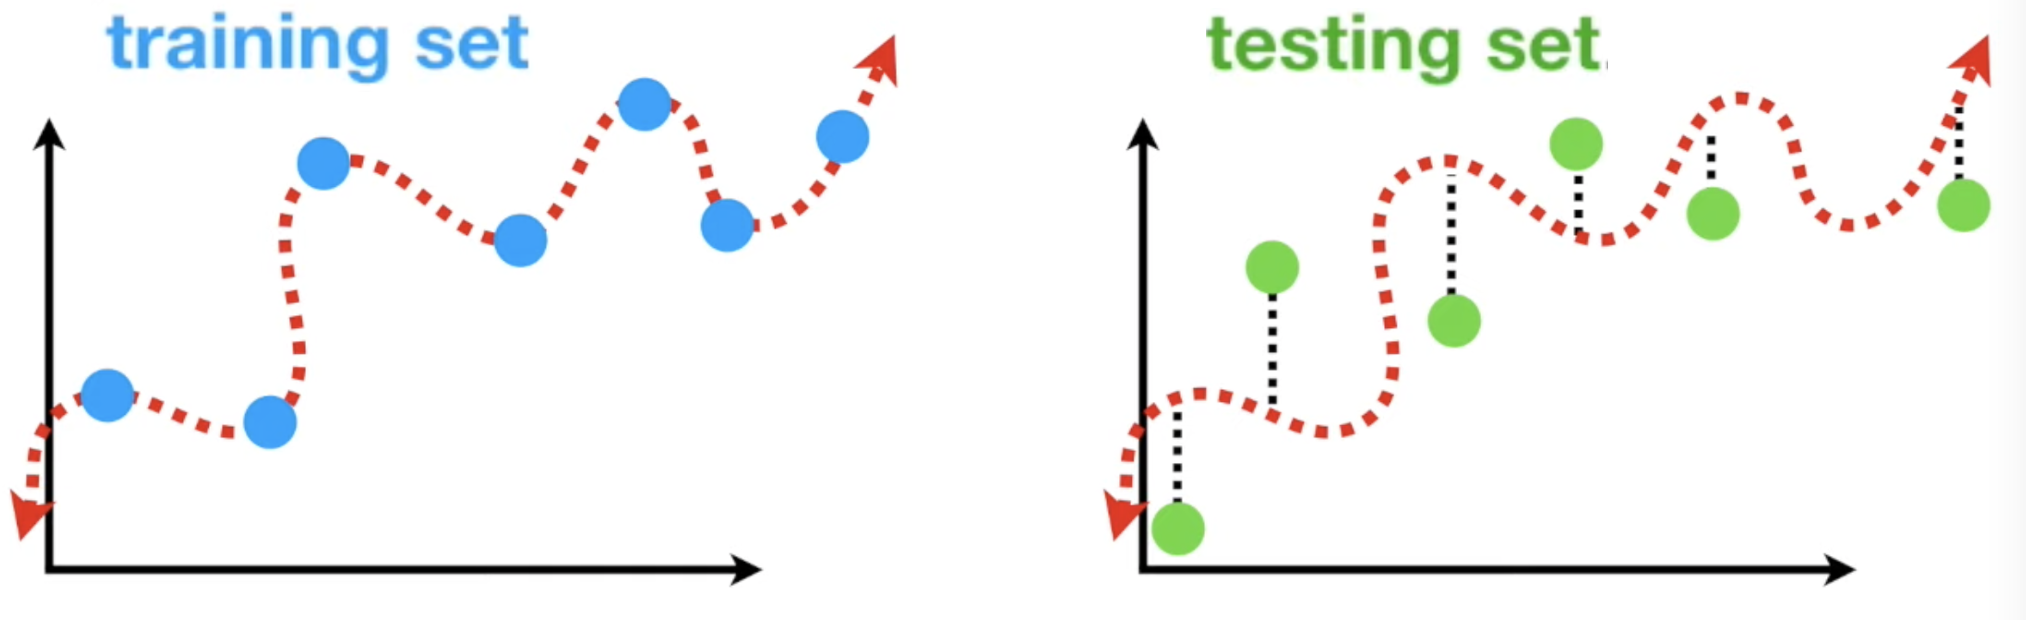

Поэтому применим кросс-валидацию:

In [434]:
# Многие выбирают k=5 для начала
k = 5
errors = []

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Размер одной части
fold_size = len(X) // k


for i in range(k):
    # Берём все значения, кроме выбранной части
    X_train = X[:i * fold_size].append(X[(i + 1) * fold_size:])
    y_train = y[:i * fold_size].append(y[(i + 1) * fold_size:])
    
    # Берём выбранную часть
    X_test = X[i * fold_size:(i + 1) * fold_size]
    y_test = y[i * fold_size:(i + 1) * fold_size]
    
    # На каждой итерации обучаемся отдельно и сохраняем ошибку
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    errors.append(mean_squared_error(y_pred, y_test))
    
# Выводим ошибку на кросс-валидации
print(np.mean(errors))

3.0729465971002106


In [435]:
# А можно не париться и попросить sklearn всё сделать за нас
from sklearn.model_selection import cross_val_score

# Берём с отрицательным знаком, т.к. обычно туда передаётся не функция потерь, которую надо минимизировать
# А что-то вроде "функции успеха", которую надо максимизировать
errors = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(errors))

3.0729465971002106


Видно, что ошибка больше, чем тогда на обучающей выборке, поэтому есть показания думать, что это переобучение. Отчего оно обычно происходит? Мы берём слишком много лишних признаков или делаем модель слишком сложной для данной задачи. Для решения этой задачи существует регуляризация.

### Регуляризация

Регуляризация - это искусстенное занижение всех параметров моделей ($\beta_0,\beta_1,...$). Это помогает упростить модель, т.к. низкие значения $\beta_i$ означают, что модель будет выдавать результаты близкие к прямой (или гиперплоскости, если параметров много). А также зануление некоторых коэффициентов может убрать ненужные признаки из обучения. Однако как всё это сделать так, чтобы не убрать нужные признаки?

Посмотрим на функцию потерь, которую мы минимизируем:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2$$

Добавим туда слагаемое, которое поможет нам понизить значения наших $\beta_i$:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m\beta_i^2$$

Действительно, если мы будем понижать нашу функцию потерь $L(\beta)$, то мы будем минимизировать и второе слагаемое, которое и отвечает за абсолютные величины $\beta_i$. Осталось указать, что $\lambda$ это некоторый числовой коэффициент, который позволяет играться между очень сильной и очень слабой регуляризацией. Если он большой, то регуляризация сильная и модель будет более простой, меньше переобучаться, больше недообучаться, и наоброт. 

Забыл добавить, что это была L2-регуляризация.
L1-регуляризация выглядит так:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m|\beta_i|$$
Она отличается от L2 тем, что она обнуляет некоторые коэффициенты, а L2 пытается всё уменьшать равномерно.

В sklearn L1-регуляризация - это Lasso, а L2-регуляризация - это Ridge. Давайте посмотрим, какое качество они нам дадут на кросс-валидации.

In [436]:
# L1
from sklearn.linear_model import Lasso

reg = Lasso( ).fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг=3.040215583480375
Коэффициент для TV=0.045661415380019485
Коэффициент для Radio=0.1834643975886825
Коэффициент для Newspaper=0.0

Результат=3.041405896751369


Видно, что признак с рекламой в газетах модель захотела полностью убрать из выборки.

In [437]:
# L2
from sklearn.linear_model import Ridge

reg = Ridge( ).fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))
print()

errors = -cross_val_score(Ridge(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг = 2.9389674583301506
Коэффициент для TV = 0.045764643658018474
Коэффициент для Radio = 0.18852509681078544
Коэффициент для Newspaper = -0.0010362939589070004

Результат=3.0729326732984967


In [438]:
reg.coef_

array([ 0.04576464,  0.1885251 , -0.00103629])

Тут модель полностью не зануляла все признаки, а уменьшила их веса некоторых из них, а некоторых увеличила. Но изменения были столь незначительные, что качество не изменилось.

Как видно, качество не сильно улучшилось. Это всё потому что, мы не подбирали параметр параметр lambda (в моделях он называется alpha), а оставили его равным 1.0. Вот тут нам и приходит на помощь кросс-валидация.

Попробуем сначала Lasso. Давайте сначала поступим по тупому, и будем выбирать параметр lambda на обучающей выборке.

In [439]:
lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Lasso(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
(0.1, 2.7842286851696874)
(0.30000000000000004, 2.784985993046452)
(0.5000000000000001, 2.7857256993570276)
(0.7000000000000001, 2.7868352725638887)
(0.9000000000000001, 2.7883147049707757)
(1.1000000000000003, 2.790163996577688)
(1.3000000000000003, 2.7923831473846246)
(1.5000000000000004, 2.7949721573915873)
(1.7000000000000004, 2.7979310265985737)
(1.9000000000000004, 2.8012597550055864)
(2.1000000000000005, 2.804958342612624)
(2.3000000000000007, 2.8090267894196854)
(2.5000000000000004, 2.813465095426774)
(2.7000000000000006, 2.8182732606338856)
(2.900000000000001, 2.8234512850410236)

Оптимальная lambda:
Lambda=0.10, результат=3.07


А теперь сделайте так, чтобы сохранялась ошибка не на обучающей выборке, а на кросс-валдиации (cross_val_score) и минимум выбирался из неё. 

**(0.5 балла) Обязательное задание 4:** нарисуйте график зависимости ошибки на тестовом множестве от коэффициента регуляризации. При какой степени ошибка минимальна?

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]

Оптимальная lambda:
Lambda=1.90, результат=3.03


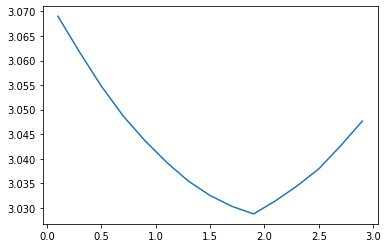

In [440]:
lambdas = np.arange(0.1, 3.0, 0.2)
print("Все лямбды:")
print(lambdas)

lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Lasso(alpha=val), X, y, cv=5,
                                                scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

**(0.5 балла) Обязательное задание 5:** Сделайте то же самое для L2-регуляризации:

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]

Оптимальная lambda:
Lambda=2.90, результат=3.07


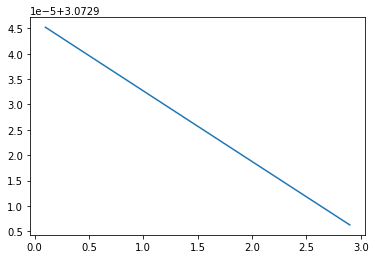

In [441]:
lambdas = np.arange(0.1, 3.0, 0.2)
print("Все лямбды:")
print(lambdas)

lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Ridge(alpha=val), X, y, cv=5,
                                                scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

ошибка изменилась аж на 4е-5, вау, L2-регуляризация вперёд

Если всё было правильно, то данные манипуляции помогут немного улучшить качество вашей модели. Это поднимет вас на несколько мест в соревнованиях, или вашему работодателю даст побольше прибыли.

## P.S. meme

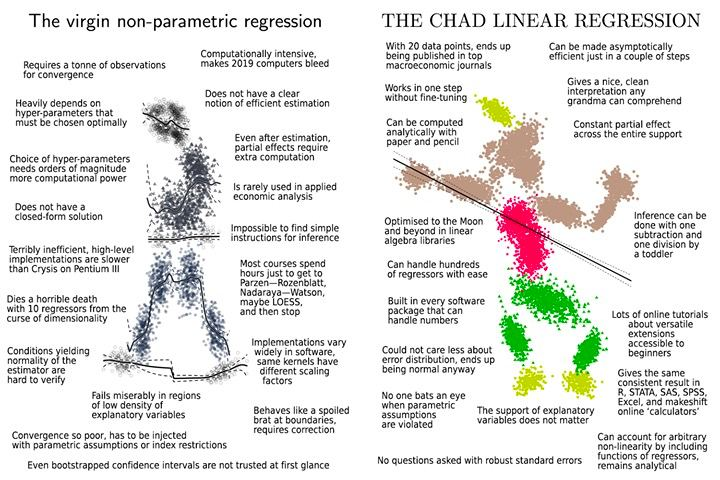

## Дополнительные материалы для самостоятельного изучения

* Визуальное представление основ линейной алгебры [здесь](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab). (рус. субтитры)

* Визуальное представление основ математического анализа [здесь](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr). (рус. субтитры)

# Основное домашнее задание (6 баллов + гешефт за улучшения)

In [442]:
# https://drive.google.com/file/d/1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu/view?usp=sharing
! gdown --id 1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu
To: /content/diabetes.data.csv
100% 18.5k/18.5k [00:00<00:00, 24.1MB/s]


Для домашнего задания вы используете другой датасет.

In [443]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


В датасете приводится информация о пациентах и их состоянии при заболевании диабетом. Описание признаков можно прочитать [здесь](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Колонка Y - целевая переменная:

In [444]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

X.shape, y.shape

((442, 10), (442,))

**Ваша задача** - провести то же исследование, что и в датасете в самом начале (Sales ~ TV, Radio, Newspaper). В итоге, нужно получить модель линейной регрессии, качество которой надо вывести с помощью cross_val_score с метрикой MSE (тоже самое в общем).

**Целевая метрика - MSE**

За каждое достойное улучшение качества на cross_val_score будут доп. баллы. Не забудьте описать, что использовали, что получилось и нет, а также попробуйте понять почему. Побольше гуглите. 

Возможные улучшения:
* Нормализация данных: вычитаем из каждой колонки её среднее и делим на стандартное отклонение.
* Пробуйте убрать ненужные признаки.
* Можно перемножать некоторые признаки.
* Погуглите что-то вроде "improve linear regression".

В общем, представьте, что вы работаете датасаентистом, получаете *300K bucks*, а вам сказали, что нужно как можно лучше уметь предсказывать такие данные.

<img src="https://c.tenor.com/JZ1XdjdbHs8AAAAC/futurama-fry.gifhttps://c.tenor.com/3M8C_1GPijcAAAAC/master-gachi.gif">

## Шаг 1: нормализация данных

Нормализовать данные нужно первым делом: без этого не получится сравнить важность признаков между собой, посмотрев на коэффициенты регрессии.

Заметим, что хотя пол и является категориальным признаком, он принимает только два значения, тогда у них есть только два варианта расположения относительно друг друга на числовой прямой, причём оба могут быть достигнуты с помощью коэффициентов разных знаков. Следовательно, вместо one hot encoding достаточно нормализовать признак вместе с остальными.

In [445]:
X.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [446]:
X_norm = (X - X.mean()) / X.std()

In [447]:
X_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.799594,1.064282,1.295620,0.459320,-0.928693,-0.731236,-0.911418,-0.054438,0.418057,-0.370569
1,-0.039522,-0.937474,-1.080955,-0.552878,-0.177423,-0.402430,1.562643,-0.829361,-1.434962,-1.936285
2,1.791277,1.064282,0.933475,-0.119079,-0.957588,-0.718084,-0.679475,-0.054438,0.060087,-0.544537
3,-1.870322,-0.937474,-0.243495,-0.769778,0.256002,0.524802,-0.756789,0.720486,0.476443,-0.196600
4,0.113044,-0.937474,-0.764079,0.459320,0.082632,0.327519,0.170984,-0.054438,-0.671740,-0.979458


Ну ладно, так и быть, пол всё-таки можно привести к виду $\pm1$:

In [448]:
def sensemaker(x):
    return (x - 1.5) * 2


X_norm['SEX'] = X['SEX'].apply(sensemaker)

In [449]:
X_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.799594,1.0,1.295620,0.459320,-0.928693,-0.731236,-0.911418,-0.054438,0.418057,-0.370569
1,-0.039522,-1.0,-1.080955,-0.552878,-0.177423,-0.402430,1.562643,-0.829361,-1.434962,-1.936285
2,1.791277,1.0,0.933475,-0.119079,-0.957588,-0.718084,-0.679475,-0.054438,0.060087,-0.544537
3,-1.870322,-1.0,-0.243495,-0.769778,0.256002,0.524802,-0.756789,0.720486,0.476443,-0.196600
4,0.113044,-1.0,-0.764079,0.459320,0.082632,0.327519,0.170984,-0.054438,-0.671740,-0.979458


In [450]:
px.histogram(y)

Нормального распределения не получилось, попробуем привести к нему:

In [451]:
y_norm = np.sqrt(y)

In [452]:
px.histogram(y_norm)

## Шаг 2: унижение признаков L1-регуляризацией (отбор признаков)

Во-первых, мы обнаружим слабо влияющие признаки (но не отправим их в забвение, а чуть позже проверим, не взаимодействуют ли они с остальными)

Во-вторых, мы увидим первую MSE, от которой будем отталкиваться




Оптимальная lambda:
Lambda=0.04, результат=5.14


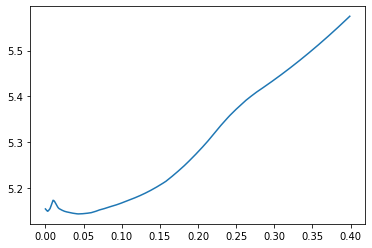

In [453]:
# тут мы выбираем себе параметр lambda, чтобы решить, 
# насколько жестоко надо относиться к признакам

lambdas = np.arange(0.0, 0.4, 0.001)

lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Lasso(alpha=val), X_norm, y_norm, cv=10,
                                                scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

In [454]:
# с выбранной жестокостью укрощаем фичи
from sklearn.linear_model import Lasso

trial_reg = Lasso(alpha=0.04).fit(X_norm, y_norm)

print("Сдвиг={}".format(trial_reg.intercept_))
for column, coef in zip(X.columns, trial_reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(alpha=0.04), X_norm, y_norm, cv=10, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг=11.89435346059214
Коэффициент для AGE=0.0
Коэффициент для SEX=-0.40003737519275445
Коэффициент для BMI=0.9520614065613211
Коэффициент для BP=0.5686760282991647
Коэффициент для S1=-0.1412503294440292
Коэффициент для S2=-0.0
Коэффициент для S3=-0.49979087234880437
Коэффициент для S4=0.0
Коэффициент для S5=1.0322416414432454
Коэффициент для S6=0.05873408337344884

Результат=5.1443017954341945


Lasso посчитала признаки AGE, S2 и S4 малозначительными и обнулила их влияние на предсказание. Отделим их от основного датасета, но не будем спешить выбрасывать их на инфопомойку, они могут влиять на предсказания косвенно: например, через интеракции (произведения) 

In [455]:
X_age = X_norm['AGE']
X_s2 = X_norm['S2']
X_s4 = X_norm['S4']
X_norm_full = X_norm.copy(deep=True)    # пригодится попозже
X_norm = X_norm.drop(['AGE', 'S2', 'S4'], axis=1)

Обратим внимание, что после ликвидации некоторых столбиков ошибка чуть-чуть упала (подстраиваться под лишние переменные больше не нужно), но L1-регуляризация теперь не делает лучше, ведь веса и сами по себе получаются не сильно высокими:


Оптимальная lambda:
Lambda=0.00, результат=5.11


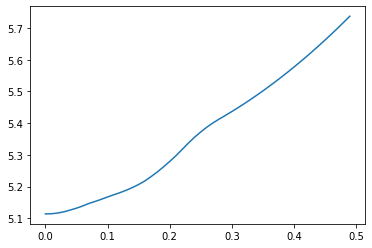

In [456]:
lambdas = np.arange(0.0, 0.5, 0.01)
lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Lasso(alpha=val), X_norm, y_norm, cv=10,
                                                scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

То же самое относится и к L2-регуляризации, Ridge-модель не смогла сильно понизить ошибку (см. следующий блок с кодом), поэтому временно отставим регуляризацию как средство от переобучения и будем использовать Lasso-модель для проверки своих жутких произведений признаков (см. Шаг 3)


Оптимальная Ridge-lambda:
Lambda=16.00, результат=5.11


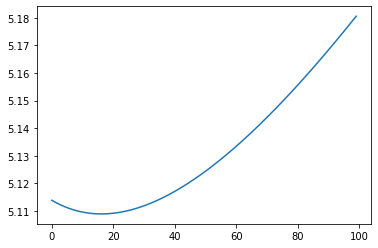

In [457]:
lambdas = np.arange(0.0, 100.0, 1)
lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Ridge(alpha=val), X_norm, y_norm, cv=10,
                                                scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
print("\nОптимальная Ridge-lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

## Шаг 3: поиск удачных интеракций (произведений)

Есть два способа поиска всяких нелинейностей и интеракций: human curated и machine curated. Первый предполагает самостоятельный анализ признаков, исходя из здравого смысла, логических или предметных соображений, знаний области и прочего. Однако без познаний в медицине и биологии вариант отпадает.

Тем не менее, прямо сейчас мы не будем брать и попарно умножать все столбики, а воспользуемся отсеянными ранее признаками:

In [458]:
# сочиняем все комбинации из неиспользуемых столбиков датасета
X_age_s2 = X_age * X_s2
X_age_s4 = X_age * X_s4
X_s2_s4 = X_s2 * X_s4
X_age_s2_s4 = X_age * X_s2 * X_s4

In [459]:
for additional in (X_age_s2, X_age_s4, X_s2_s4, X_age_s2_s4):
    X_modified = X_norm.copy(deep=True)
    X_modified['Additional'] = additional
    
    trial_reg = Lasso(alpha=0.04).fit(X_modified, y)

    print("Сдвиг: {}".format(trial_reg.intercept_))
    for column, coef in zip(X_modified.columns, trial_reg.coef_):
        print("Коэффициент для {}: {}".format(column, coef))

    errors = -cross_val_score(Lasso(alpha=0.04), X_modified, y_norm, cv=10, scoring='neg_mean_squared_error')
    print("Результат: {}".format(np.mean(errors)))
    print()

Сдвиг: 151.3271145045939
Коэффициент для SEX: -10.990476724083019
Коэффициент для BMI: 25.15821905023471
Коэффициент для BP: 14.996448538003168
Коэффициент для S1: -6.8904945420629184
Коэффициент для S3: -11.13346687642835
Коэффициент для S5: 25.71837864696455
Коэффициент для S6: 3.425773049099565
Коэффициент для Additional: 0.5035054461996352
Результат: 5.143701144685283

Сдвиг: 150.71592471553387
Коэффициент для SEX: -10.670807601602139
Коэффициент для BMI: 25.6090444864178
Коэффициент для BP: 14.935075930911538
Коэффициент для S1: -6.537781158137252
Коэффициент для S3: -10.58037580256924
Коэффициент для S5: 25.930493586400633
Коэффициент для S6: 3.1809904397898774
Коэффициент для Additional: 3.64628627088203
Результат: 5.150612164354707

Сдвиг: 151.1465188486794
Коэффициент для SEX: -11.018872456071957
Коэффициент для BMI: 25.096757914366663
Коэффициент для BP: 15.02475627987786
Коэффициент для S1: -7.05910688211201
Коэффициент для S3: -11.088677251108951
Коэффициент для S5: 25.7754

Все 4 произведения видимо, не помогут в предсказании таргета - результат не улучшился.

## Шаг 4: поиск нелинейных зависимостей

### Посмотрим на зависимости таргета от регрессоров:

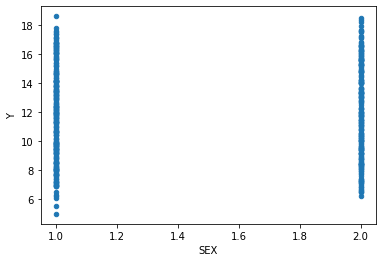

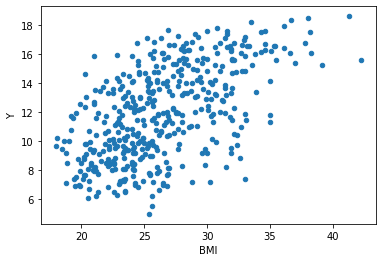

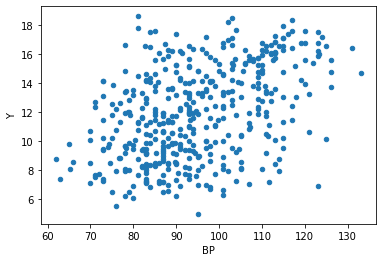

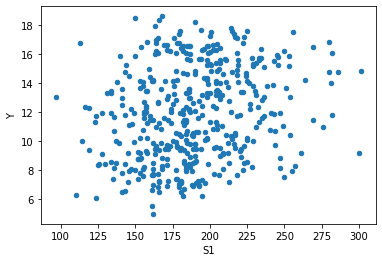

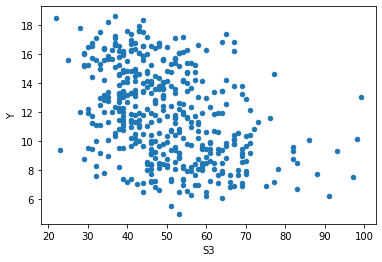

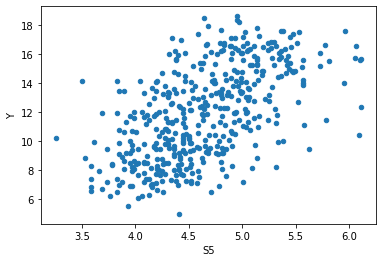

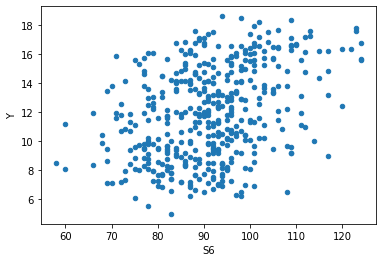

In [460]:
X_target = X.copy(deep=True)
X_target['Y'] = y_norm
for tag in ('SEX', 'BMI', 'BP', 'S1', 'S3', 'S5', 'S6'):
    A = X_target.plot(kind='scatter', x=tag, y='Y')

Мало что понятно, попробуем по-другому:

In [461]:
import plotly.express as px

for tag in ('SEX', 'BMI', 'BP', 'S1', 'S3', 'S5', 'S6'):
    altered_df = X_target[[tag, 'Y']].groupby(tag, as_index=False).median()
    fig = px.scatter(altered_df, x=tag, y='Y')
    fig.show(renderer='colab')

Явных нелинейных зависимостей таргета от регрессоров на примерах из датасета не видно, тогда ВСЁ-ТАКИ попробуем найти программно все возможные произведения двух признаков

### Перебор произведений

In [462]:
tags = ('AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6')
top_results = dict()
products = dict()
for tag1 in tags:
    for tag2 in tags:
        X_modified = X_norm.copy(deep=True)
        X_modified[tag1 + '*' + tag2] = X_norm_full[tag1] * X_norm_full[tag2]
        products[tag1 + '*' + tag2] = X_norm_full[tag1] * X_norm_full[tag2]

        errors = -cross_val_score(Lasso(alpha=0.04), X_modified, y_norm, cv=10, scoring='neg_mean_squared_error')
        tag_first, tag_second = sorted((tag1, tag2))
        top_results[tag_first + '*' + tag_second] = np.mean(errors)

top_results = sorted(top_results.items(), key=lambda x: x[1])
for product, result in top_results:
    print(f"Результат c {product}: {result}")

Результат c AGE*SEX: 4.996836661836911
Результат c S6*S6: 5.063377592649888
Результат c AGE*S6: 5.078696330466203
Результат c AGE*AGE: 5.078863356380117
Результат c BMI*BP: 5.080382769317319
Результат c BMI*SEX: 5.086999568288316
Результат c S6*SEX: 5.091858095909318
Результат c BP*SEX: 5.095286623717383
Результат c BMI*S6: 5.0986333495938
Результат c S5*SEX: 5.113398616044528
Результат c S2*S6: 5.113655253899908
Результат c AGE*BP: 5.115253309433817
Результат c S4*S6: 5.115406885875057
Результат c S1*S6: 5.11697705096327
Результат c BMI*BMI: 5.11989944688689
Результат c S3*S5: 5.119992047683622
Результат c S2*S5: 5.120828007219123
Результат c AGE*BMI: 5.125069246362061
Результат c SEX*SEX: 5.126036290247279
Результат c S4*SEX: 5.126036319213976
Результат c BP*BP: 5.126879534235369
Результат c AGE*S5: 5.126920896162787
Результат c S1*S5: 5.128272756058757
Результат c S3*S4: 5.128966665899184
Результат c S2*SEX: 5.1294729803923955
Результат c S3*SEX: 5.130486531165848
Результат c S1*S3:

Что неожиданно, ранее будто не имевшие влияния на таргет переменные в произведениях дали серьёзное падение лосса на кроссвалидации, хотя в Шаге 3 мы попробовали их использовать, но в только в произведениях между собой. Вообще такое бывает, когда признаки связаны друг с другом и в связке влияют сильнее, например, индекс массы тела и давление крови.

Попробуем использовать одновременно первые N лучших произведений.

In [463]:
top_pairs = [x[0] for x in top_results]
X_modified = X_norm.copy(deep=True)

for pair_num in range(len(top_pairs)):
    pair_name = top_pairs[pair_num]
    X_modified[pair_name] = products[pair_name]

    errors = -cross_val_score(Lasso(alpha=0.04), X_modified, y_norm, cv=10, scoring='neg_mean_squared_error')
    print(f'Результат (+ {pair_num + 1}): {np.mean(errors)}')

Результат (+ 1): 4.996836661836911
Результат (+ 2): 4.9357546325841115
Результат (+ 3): 4.939199218498855
Результат (+ 4): 4.937328159743664
Результат (+ 5): 4.911000481050226
Результат (+ 6): 4.921830049371798
Результат (+ 7): 4.927162315366225
Результат (+ 8): 4.942539863214695
Результат (+ 9): 4.949109896111342
Результат (+ 10): 4.949110414658957
Результат (+ 11): 4.962997553552611
Результат (+ 12): 4.980649852071289
Результат (+ 13): 4.987737582301512
Результат (+ 14): 4.987737593999888
Результат (+ 15): 4.997610596029578
Результат (+ 16): 4.979031311716295
Результат (+ 17): 4.977739655170245
Результат (+ 18): 4.9831665949828245
Результат (+ 19): 4.9831665949828245
Результат (+ 20): 4.991902716324696
Результат (+ 21): 4.991898941934964
Результат (+ 22): 5.008704274946669
Результат (+ 23): 5.017816608232101
Результат (+ 24): 5.0309461047263095
Результат (+ 25): 5.050652340425005
Результат (+ 26): 5.053875482790002
Результат (+ 27): 5.070940423286937
Результат (+ 28): 5.0709727953917

Отсюда видно, что при использовании первых 5 произведений достигается наименьший лосс. Замечу, что он сильно упал по сравнению с версией без интеракций (там он был 4.911). Сохраним лучший вариант датасета:

In [464]:
X_interactions = X_norm.copy(deep=True)
for pair_num in range(5):
    pair_name = top_pairs[pair_num]
    X_interactions[pair_name] = products[pair_name]

In [465]:
X_interactions

,SEX,BMI,BP,S1,S3,S5,S6,AGE*SEX,S6*S6,AGE*S6,AGE*AGE,BMI*BP
0,1.0,1.295620,0.459320,-0.928693,-0.911418,0.418057,-0.370569,0.799594,0.137321,-0.296304,0.639351,0.595104
1,-1.0,-1.080955,-0.552878,-0.177423,1.562643,-1.434962,-1.936285,0.039522,3.749200,0.076527,0.001562,0.597636
2,1.0,0.933475,-0.119079,-0.957588,-0.679475,0.060087,-0.544537,1.791277,0.296521,-0.975417,3.208673,-0.111157
3,-1.0,-0.243495,-0.769778,0.256002,-0.756789,0.476443,-0.196600,1.870322,0.038652,0.367706,3.498103,0.187437
4,-1.0,-0.764079,0.459320,0.082632,0.170984,-0.671740,-0.979458,-0.113044,0.959339,-0.110722,0.012779,-0.350957
...,...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.412892,1.254619,-0.119633,-0.602160,0.655045,0.151337,0.875877,0.022903,0.132553,0.767161,0.518022
438,1.0,-0.334032,-1.420477,1.036167,-0.602160,-0.380388,0.934195,-0.115806,0.872720,-0.108185,0.013411,0.474484
439,1.0,-0.334032,0.363161,-0.784218,-0.524846,-0.984533,0.325305,0.875877,0.105824,0.284928,0.767161,-0.121307
440,-1.0,0.820305,0.025521,0.342687,-0.602160,0.935103,-0.544537,0.954922,0.296521,0.519990,0.911876,0.020935


## Шаг 5: подчистка после добавления найденных интеракций

Мы добавили произведения признаков в датасет, очевидно, что они кореллируют с оригинальными признаками, ведь они буквально их произведения. Посмотрим, что получится, если убрать оригиналы:

In [466]:
# убираем S6, потому что есть S6*S6
X_trial = X_interactions.copy(deep=True)
X_trial = X_trial.drop(['S6'], axis=1)

In [467]:
X_trial

,SEX,BMI,BP,S1,S3,S5,AGE*SEX,S6*S6,AGE*S6,AGE*AGE,BMI*BP
0,1.0,1.295620,0.459320,-0.928693,-0.911418,0.418057,0.799594,0.137321,-0.296304,0.639351,0.595104
1,-1.0,-1.080955,-0.552878,-0.177423,1.562643,-1.434962,0.039522,3.749200,0.076527,0.001562,0.597636
2,1.0,0.933475,-0.119079,-0.957588,-0.679475,0.060087,1.791277,0.296521,-0.975417,3.208673,-0.111157
3,-1.0,-0.243495,-0.769778,0.256002,-0.756789,0.476443,1.870322,0.038652,0.367706,3.498103,0.187437
4,-1.0,-0.764079,0.459320,0.082632,0.170984,-0.671740,-0.113044,0.959339,-0.110722,0.012779,-0.350957
...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.412892,1.254619,-0.119633,-0.602160,0.655045,0.875877,0.022903,0.132553,0.767161,0.518022
438,1.0,-0.334032,-1.420477,1.036167,-0.602160,-0.380388,-0.115806,0.872720,-0.108185,0.013411,0.474484
439,1.0,-0.334032,0.363161,-0.784218,-0.524846,-0.984533,0.875877,0.105824,0.284928,0.767161,-0.121307
440,-1.0,0.820305,0.025521,0.342687,-0.602160,0.935103,0.954922,0.296521,0.519990,0.911876,0.020935



Оптимальная Ridge-lambda:
Lambda=25.00, результат=4.8841


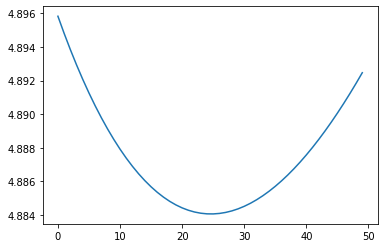

In [468]:
lambdas = np.arange(0, 50, 1)
lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Ridge(alpha=val), 
                                                        X_trial, y_norm, cv=10, 
                                                        scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
print("\nОптимальная Ridge-lambda:")
print("Lambda={:.2f}, результат={:.4f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

Да, сработало, так как корреляция между S6 и S6*S6 ухудшала результат, продолжим процесс:

In [469]:
X_trial2 = X_trial.drop(['SEX'], axis=1)
X_trial2

,BMI,BP,S1,S3,S5,AGE*SEX,S6*S6,AGE*S6,AGE*AGE,BMI*BP
0,1.295620,0.459320,-0.928693,-0.911418,0.418057,0.799594,0.137321,-0.296304,0.639351,0.595104
1,-1.080955,-0.552878,-0.177423,1.562643,-1.434962,0.039522,3.749200,0.076527,0.001562,0.597636
2,0.933475,-0.119079,-0.957588,-0.679475,0.060087,1.791277,0.296521,-0.975417,3.208673,-0.111157
3,-0.243495,-0.769778,0.256002,-0.756789,0.476443,1.870322,0.038652,0.367706,3.498103,0.187437
4,-0.764079,0.459320,0.082632,0.170984,-0.671740,-0.113044,0.959339,-0.110722,0.012779,-0.350957
...,...,...,...,...,...,...,...,...,...,...
437,0.412892,1.254619,-0.119633,-0.602160,0.655045,0.875877,0.022903,0.132553,0.767161,0.518022
438,-0.334032,-1.420477,1.036167,-0.602160,-0.380388,-0.115806,0.872720,-0.108185,0.013411,0.474484
439,-0.334032,0.363161,-0.784218,-0.524846,-0.984533,0.875877,0.105824,0.284928,0.767161,-0.121307
440,0.820305,0.025521,0.342687,-0.602160,0.935103,0.954922,0.296521,0.519990,0.911876,0.020935



Оптимальная Ridge-lambda:
Lambda=22.00, результат=5.03


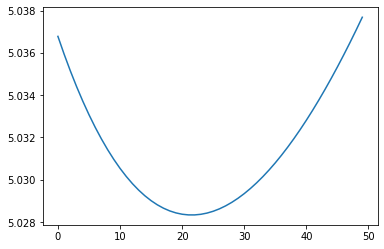

In [470]:
lambdas = np.arange(0, 50, 1)
lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Ridge(alpha=val), 
                                                        X_trial2, y_norm, cv=10, 
                                                        scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
print("\nОптимальная Ridge-lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

С полом так не получилось, важность переменной пересилила корреляцию (буквально совпадение знаков SEX и AGE*SEX)

In [471]:
X_trial2 = X_trial.drop(['BMI'], axis=1)
X_trial2

,SEX,BP,S1,S3,S5,AGE*SEX,S6*S6,AGE*S6,AGE*AGE,BMI*BP
0,1.0,0.459320,-0.928693,-0.911418,0.418057,0.799594,0.137321,-0.296304,0.639351,0.595104
1,-1.0,-0.552878,-0.177423,1.562643,-1.434962,0.039522,3.749200,0.076527,0.001562,0.597636
2,1.0,-0.119079,-0.957588,-0.679475,0.060087,1.791277,0.296521,-0.975417,3.208673,-0.111157
3,-1.0,-0.769778,0.256002,-0.756789,0.476443,1.870322,0.038652,0.367706,3.498103,0.187437
4,-1.0,0.459320,0.082632,0.170984,-0.671740,-0.113044,0.959339,-0.110722,0.012779,-0.350957
...,...,...,...,...,...,...,...,...,...,...
437,1.0,1.254619,-0.119633,-0.602160,0.655045,0.875877,0.022903,0.132553,0.767161,0.518022
438,1.0,-1.420477,1.036167,-0.602160,-0.380388,-0.115806,0.872720,-0.108185,0.013411,0.474484
439,1.0,0.363161,-0.784218,-0.524846,-0.984533,0.875877,0.105824,0.284928,0.767161,-0.121307
440,-1.0,0.025521,0.342687,-0.602160,0.935103,0.954922,0.296521,0.519990,0.911876,0.020935



Оптимальная Ridge-lambda:
Lambda=24.00, результат=5.59


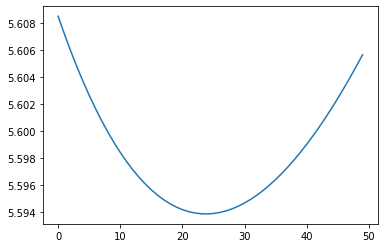

In [472]:
lambdas = np.arange(0, 50, 1)
lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Ridge(alpha=val), 
                                                        X_trial2, y_norm, cv=10, 
                                                        scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
print("\nОптимальная Ridge-lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

# не подошло

In [473]:
X_trial2 = X_trial.drop(['BP'], axis=1)
X_trial2

,SEX,BMI,S1,S3,S5,AGE*SEX,S6*S6,AGE*S6,AGE*AGE,BMI*BP
0,1.0,1.295620,-0.928693,-0.911418,0.418057,0.799594,0.137321,-0.296304,0.639351,0.595104
1,-1.0,-1.080955,-0.177423,1.562643,-1.434962,0.039522,3.749200,0.076527,0.001562,0.597636
2,1.0,0.933475,-0.957588,-0.679475,0.060087,1.791277,0.296521,-0.975417,3.208673,-0.111157
3,-1.0,-0.243495,0.256002,-0.756789,0.476443,1.870322,0.038652,0.367706,3.498103,0.187437
4,-1.0,-0.764079,0.082632,0.170984,-0.671740,-0.113044,0.959339,-0.110722,0.012779,-0.350957
...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.412892,-0.119633,-0.602160,0.655045,0.875877,0.022903,0.132553,0.767161,0.518022
438,1.0,-0.334032,1.036167,-0.602160,-0.380388,-0.115806,0.872720,-0.108185,0.013411,0.474484
439,1.0,-0.334032,-0.784218,-0.524846,-0.984533,0.875877,0.105824,0.284928,0.767161,-0.121307
440,-1.0,0.820305,0.342687,-0.602160,0.935103,0.954922,0.296521,0.519990,0.911876,0.020935



Оптимальная Ridge-lambda:
Lambda=20.00, результат=5.17


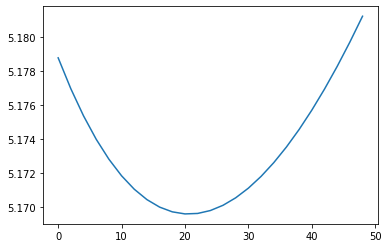

In [474]:
lambdas = np.arange(0, 50, 2)
lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Ridge(alpha=val), 
                                                        X_trial2, y_norm, cv=10, 
                                                        scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
print("\nОптимальная Ridge-lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

# тоже не подошло

In [475]:
X_trial2 = X_trial.drop(['AGE*S6'], axis=1)
X_trial2['AGE*AGE*S6*S6'] = X_trial['AGE*AGE'] * X_trial['S6*S6']
X_trial2

,SEX,BMI,BP,S1,S3,S5,AGE*SEX,S6*S6,AGE*AGE,BMI*BP,AGE*AGE*S6*S6
0,1.0,1.295620,0.459320,-0.928693,-0.911418,0.418057,0.799594,0.137321,0.639351,0.595104,0.087796
1,-1.0,-1.080955,-0.552878,-0.177423,1.562643,-1.434962,0.039522,3.749200,0.001562,0.597636,0.005856
2,1.0,0.933475,-0.119079,-0.957588,-0.679475,0.060087,1.791277,0.296521,3.208673,-0.111157,0.951438
3,-1.0,-0.243495,-0.769778,0.256002,-0.756789,0.476443,1.870322,0.038652,3.498103,0.187437,0.135207
4,-1.0,-0.764079,0.459320,0.082632,0.170984,-0.671740,-0.113044,0.959339,0.012779,-0.350957,0.012259
...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.412892,1.254619,-0.119633,-0.602160,0.655045,0.875877,0.022903,0.767161,0.518022,0.017570
438,1.0,-0.334032,-1.420477,1.036167,-0.602160,-0.380388,-0.115806,0.872720,0.013411,0.474484,0.011704
439,1.0,-0.334032,0.363161,-0.784218,-0.524846,-0.984533,0.875877,0.105824,0.767161,-0.121307,0.081184
440,-1.0,0.820305,0.025521,0.342687,-0.602160,0.935103,0.954922,0.296521,0.911876,0.020935,0.270390



Оптимальная Ridge-lambda:
Lambda=24.000, результат=4.8835


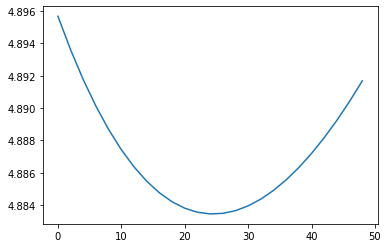

In [476]:
lambdas = np.arange(0, 50, 2)
lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Ridge(alpha=val), 
                                                        X_trial2, y_norm, cv=10, 
                                                        scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
print("\nОптимальная Ridge-lambda:")
print("Lambda={:.3f}, результат={:.4f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

# как бы подошло, но практически не изменило результат

При попытке убрать любой из оригиналов признаков результат ухудшался (или почти не менялся), кроме S6. Оставим лучший результат:

In [477]:
# лучший вариант датасета
X_interactions = X_trial2.copy(deep=True)
X_interactions

,SEX,BMI,BP,S1,S3,S5,AGE*SEX,S6*S6,AGE*AGE,BMI*BP,AGE*AGE*S6*S6
0,1.0,1.295620,0.459320,-0.928693,-0.911418,0.418057,0.799594,0.137321,0.639351,0.595104,0.087796
1,-1.0,-1.080955,-0.552878,-0.177423,1.562643,-1.434962,0.039522,3.749200,0.001562,0.597636,0.005856
2,1.0,0.933475,-0.119079,-0.957588,-0.679475,0.060087,1.791277,0.296521,3.208673,-0.111157,0.951438
3,-1.0,-0.243495,-0.769778,0.256002,-0.756789,0.476443,1.870322,0.038652,3.498103,0.187437,0.135207
4,-1.0,-0.764079,0.459320,0.082632,0.170984,-0.671740,-0.113044,0.959339,0.012779,-0.350957,0.012259
...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.412892,1.254619,-0.119633,-0.602160,0.655045,0.875877,0.022903,0.767161,0.518022,0.017570
438,1.0,-0.334032,-1.420477,1.036167,-0.602160,-0.380388,-0.115806,0.872720,0.013411,0.474484,0.011704
439,1.0,-0.334032,0.363161,-0.784218,-0.524846,-0.984533,0.875877,0.105824,0.767161,-0.121307,0.081184
440,-1.0,0.820305,0.025521,0.342687,-0.602160,0.935103,0.954922,0.296521,0.911876,0.020935,0.270390



Оптимальная Lasso-lambda:
Lambda=0.03, результат=4.8873


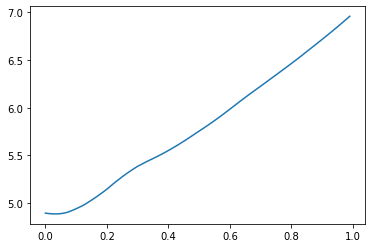

In [478]:
lambdas = np.arange(0, 1, 0.01)
lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Lasso(alpha=val), 
                                                        X_interactions, y_norm, cv=10, 
                                                        scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель (Lasso)
print("\nОптимальная Lasso-lambda:")
print("Lambda={:.2f}, результат={:.4f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

In [479]:
# попытка последний раз пообнулять коэффициенты
trial_reg = Lasso(alpha=0.03).fit(X_interactions, y_norm)

print("Сдвиг={}".format(trial_reg.intercept_))
for column, coef in zip(X_interactions.columns, trial_reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(alpha=0.03), X_interactions, y_norm, cv=10, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг=11.466735244789463
Коэффициент для SEX=-0.40612016826062836
Коэффициент для BMI=0.9826582121534323
Коэффициент для BP=0.5976646504784086
Коэффициент для S1=-0.07768533495711971
Коэффициент для S3=-0.48690534011598197
Коэффициент для S5=1.0573106321794543
Коэффициент для AGE*SEX=0.32454219393742056
Коэффициент для S6*S6=0.1425061391009888
Коэффициент для AGE*AGE=0.1620422095508081
Коэффициент для BMI*BP=0.17024766172548775
Коэффициент для AGE*AGE*S6*S6=-0.0

Результат=4.8872984601694665


In [480]:
X_interactions = X_interactions.drop(['AGE*AGE*S6*S6'], axis=1)

In [481]:
trial_reg = Lasso(alpha=0.03).fit(X_interactions, y_norm)

print("Сдвиг={}".format(trial_reg.intercept_))
for column, coef in zip(X_interactions.columns, trial_reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(alpha=0.03), X_interactions, y_norm, cv=10, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг=11.4667352523507
Коэффициент для SEX=-0.40612026726197553
Коэффициент для BMI=0.9826580659281492
Коэффициент для BP=0.597664634389044
Коэффициент для S1=-0.07768520097771557
Коэффициент для S3=-0.4869054950946309
Коэффициент для S5=1.0573105875425877
Коэффициент для AGE*SEX=0.32454219385257516
Коэффициент для S6*S6=0.14250612614114835
Коэффициент для AGE*AGE=0.16204219487986912
Коэффициент для BMI*BP=0.1702476965786611

Результат=4.862739660884911



Оптимальная Ridge-lambda:
Lambda=19.25, результат=4.8504


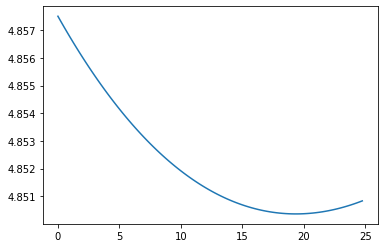

In [482]:
lambdas = np.arange(0, 25, 0.25)
lambda_errors = []

for val in lambdas:
    lambda_errors.append((val, np.mean(-cross_val_score(Ridge(alpha=val), 
                                                        X_interactions, y_norm, cv=10, 
                                                        scoring='neg_mean_squared_error'))))
    

min_val, min_cv_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель (Ridge)
print("\nОптимальная Ridge-lambda:")
print("Lambda={:.2f}, результат={:.4f}".format(min_val, min_cv_error))

lambda_errors = np.array(lambda_errors).T
plt.plot(lambda_errors[0], lambda_errors[1])
plt.show()

**Итог:** работа с данными, а не только с моделью - сила! Лучшая версия датасета включила в себя некоторые произведения признаков взамен оригинальных, таргет был приведён к чему-то похожему на нормальное распределение с помощью корневого преобразования (здесь этого не видно, но ранее работа была выполнена без преобразования таргета, что делало корень из квадрата ошибки довольно большим в сравнении с самими значениями), на уже приведённом в вид получше датасете лучше себя показала Ridge-регрессия с $\lambda = 19.25$ и MSE $=4.8504$